In [111]:
#first Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import the data
data = pd.read_excel('Olympics Dataset.xlsx')

In [3]:
data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [4]:
#check for missing values
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
data_clean = data.dropna(subset=['Medal'])

In [6]:
data_clean.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [8]:
data_clean['Age'] = data_clean.groupby(['Sport'])['Age'].transform(lambda x: x.fillna(round(x.mean(), 2)))
data_clean['Height'] = data_clean.groupby(['Sport'])['Height'].transform(lambda x: x.fillna(round(x.mean(), 2))) 
data_clean['Weight'] = data_clean.groupby(['Sport'])['Weight'].transform(lambda x: x.fillna(round(x.mean(),2)))

C:\Users\BANI\AppData\Local\Temp\ipykernel_25160\2608402153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Age'] = data_clean.groupby(['Sport'])['Age'].transform(lambda x: x.fillna(round(x.mean(), 2)))
C:\Users\BANI\AppData\Local\Temp\ipykernel_25160\2608402153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Height'] = data_clean.groupby(['Sport'])['Height'].transform(lambda x: x.fillna(round(x.mean(), 2)))
C:\Users\BANI\AppData\Local\Temp\ipykernel_25160\2608402153.py:3: Se

In [9]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39783 non-null  int64  
 1   Name    39783 non-null  object 
 2   Sex     39783 non-null  object 
 3   Age     39783 non-null  float64
 4   Height  39698 non-null  float64
 5   Weight  39621 non-null  float64
 6   Team    39783 non-null  object 
 7   NOC     39783 non-null  object 
 8   Games   39783 non-null  object 
 9   Year    39783 non-null  int64  
 10  Season  39783 non-null  object 
 11  City    39783 non-null  object 
 12  Sport   39783 non-null  object 
 13  Event   39783 non-null  object 
 14  Medal   39783 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 4.9+ MB


In [10]:
data_clean.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height     85
Weight    162
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

In [11]:
data_clean.columns[data_clean.nunique() <=1]

Index([], dtype='object')

In [12]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [16]:
import fuzzywuzzy
from fuzzywuzzy import process

team_unique = data_clean['Team'].unique()

for team in team_unique:
    matches = fuzzywuzzy.process.extract(team, team_unique, limit=2, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    if matches[1][1] >90:
        print(team, matches[1])
        

Netherlands ('Netherlands-1', 92)
United States ('United States-1', 93)
Soviet Union ('Soviet Union-2', 92)
Unified Team ('Unified Team-2', 92)
Switzerland ('Switzerland-1', 92)
East Germany ('East Germany-1', 92)
Great Britain ('Great Britain-1', 93)
Switzerland-1 ('Switzerland', 92)
Switzerland-2 ('Switzerland', 92)
Czechoslovakia ('Czechoslovakia-1', 93)
United States-1 ('United States', 93)
Great Britain-1 ('Great Britain', 93)
West Germany ('West Germany-1', 92)
Soviet Union-2 ('Soviet Union-1', 93)
East Germany-1 ('East Germany-2', 93)
South Korea ('South Korea-2', 92)
South Korea-2 ('South Korea', 92)
North Korea ('North Korea-1', 92)
Great Britain-2 ('Great Britain', 93)
Elisabeth X ('Elisabeth V', 91)
Ludwigshafener Ruderverein ('Ludwigshafener Ruder Verein-1', 95)
Czech Republic ('Czech Republic-1', 93)
West Germany-1 ('West Germany-2', 93)
United States-2 ('United States', 93)
Leander Club-2 ('Leander Club-1', 93)
Chicago Athletic Association-2 ('Chicago Athletic Association

In [18]:
import re

data_clean["Team"] = data_clean['Team'].str.replace('[^\w\s]','')
data_clean["Team"] = data_clean['Team'].str.replace('\d+', '')
data_clean['Team'] = data_clean['Team'].str.strip()

C:\Users\BANI\AppData\Local\Temp\ipykernel_25160\3405739861.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_clean["Team"] = data_clean['Team'].str.replace('[^\w\s]','')
C:\Users\BANI\AppData\Local\Temp\ipykernel_25160\3405739861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["Team"] = data_clean['Team'].str.replace('[^\w\s]','')
C:\Users\BANI\AppData\Local\Temp\ipykernel_25160\3405739861.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data_clean["Team"] = data_clean['Team'].str.replace('\d+', '')
C:\Users\BANI\AppData\Local\Temp\ipykernel_25160\3405739861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

In [34]:
#Merge Gdp data
#First we load the data in
Gdpdata = pd.read_csv('Gdpdata.csv', skiprows=3)
#Remove unnecessary columns
Gdpdata.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)
# The years columns are distributed over various rows as seen, they need to be melted into a single column for years
Gdpdata = pd.melt(Gdpdata, id_vars =['Country Name','Country Code'], var_name= 'Year', value_name='GDP')
#Now convert the Dtype of Year to Numeric rather than object
#We used the coerce to handle errors by converting to nan
Gdpdata['Year'] = pd.to_numeric(Gdpdata['Year'], errors='coerce')
Gdpdata.head()


,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960.0,NaN
1,Africa Eastern and Southern,AFE,1960.0,162.342517
2,Afghanistan,AFG,1960.0,NaN
3,Africa Western and Central,AFW,1960.0,122.193931
4,Angola,AGO,1960.0,NaN


In [35]:
#Before mergind, lets check if NOC in Olympics data mathc with those in country Code
len(list(set(data_clean['NOC'].unique())- set(Gdpdata['Country Code'].unique())))

62

In [37]:
len(list(set(data_clean['Team'].unique())- set(Gdpdata['Country Name'].unique())))

303

In [40]:
import fuzzywuzzy
from fuzzywuzzy import process

Country_unique = Gdpdata['Country Name'].unique()

for country in Country_unique:
    matches = fuzzywuzzy.process.extract(country, Country_unique, limit=2, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    if matches[1][1] >90:
        print(country, matches[1])
        

Lower middle income ('Low & middle income', 94)
Low & middle income ('Lower middle income', 94)


In [48]:
country_to_drop = Gdpdata[Gdpdata['Country Name']== 'Lower middle income'].index
Gdpdata = Gdpdata.drop(country_to_drop)
country_to_drop1 = Gdpdata[Gdpdata['Country Name']== 'Low & middle income'].index
Gdpdata = Gdpdata.drop(country_to_drop1)

In [55]:
#Merge to get country code
Olympics_merge_code = data_clean.merge(Gdpdata[['Country Name','Country Code']].drop_duplicates(),
                                      left_on = 'Team',
                                      right_on='Country Name',
                                      how='left')
Olympics_merge_code.drop('Country Name', axis= 1, inplace =True)

# Merge to get gdp too
olympics_final_merge = Olympics_merge_code.merge(Gdpdata,
                                                left_on = ['Country Code', 'Year'],
                                                right_on = ['Country Code', 'Year'],
                                                how = 'left')

olympics_final_merge.drop('Country Name', axis = 1, inplace = True)

In [59]:
olympics_final_merge.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country Code,GDP
0,4,Edgar Lindenau Aabye,M,34.0,180.30,94.14,DenmarkSweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN,NaN
1,15,Arvo Ossian Aaltonen,M,30.0,180.92,73.25,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,FIN,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,180.92,73.25,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,FIN,NaN
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,FIN,50327.24029
4,17,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,FIN,NaN


In [61]:
olympics_final_merge.isnull().sum()

ID                  0
Name                0
Sex                 0
Age                 0
Height             85
Weight            162
Team                0
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Country Code    10975
GDP             20424
dtype: int64

In [66]:
#olympics compplete subset and medal tally
#Lets take data from 1961 onwards only and for summer olympics only
Olympics_complete_subset = olympics_final_merge.loc[(olympics_final_merge['Year']>1960) & (olympics_final_merge['Season']=='Summer')]

#Reset row indices
Olympics_complete_subset=Olympics_complete_subset.reset_index()
Olympics_complete_subset.isnull().sum()

index              0
ID                 0
Name               0
Sex                0
Age                0
Height             0
Weight             0
Team               0
NOC                0
Games              0
Year               0
Season             0
City               0
Sport              0
Event              0
Medal              0
Country Code    6438
GDP             7307
dtype: int64

In [71]:
#Create columm to know if a medal was won
Olympics_complete_subset['Medal_won'] =np.where(Olympics_complete_subset.loc[:,'Medal'] =='DNw',0,1)
Olympics_complete_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22634 entries, 0 to 22633
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         22634 non-null  int64  
 1   ID            22634 non-null  int64  
 2   Name          22634 non-null  object 
 3   Sex           22634 non-null  object 
 4   Age           22634 non-null  float64
 5   Height        22634 non-null  float64
 6   Weight        22634 non-null  float64
 7   Team          22634 non-null  object 
 8   NOC           22634 non-null  object 
 9   Games         22634 non-null  object 
 10  Year          22634 non-null  int64  
 11  Season        22634 non-null  object 
 12  City          22634 non-null  object 
 13  Sport         22634 non-null  object 
 14  Event         22634 non-null  object 
 15  Medal         22634 non-null  object 
 16  Country Code  16196 non-null  object 
 17  GDP           15327 non-null  float64
 18  Medal_won     22634 non-nu

In [72]:
# Check whether number of medals won in a year for an event by a team exceeds 1. This indicates a team event.
identify_team_events = pd.pivot_table(Olympics_complete_subset,
                                      index = ['Team', 'Year', 'Event'],
                                      columns = 'Medal',
                                      values = 'Medal_won',
                                      aggfunc = 'sum',
                                     fill_value = 0).reset_index()

identify_team_events = identify_team_events.loc[identify_team_events['Gold'] > 1, :]

team_sports = identify_team_events['Event'].unique()

In [73]:
# if an event name matches with one in team sports, then it is a team event. Others are singles events.
team_event_mask = Olympics_complete_subset['Event'].map(lambda x: x in team_sports)
single_event_mask = [not i for i in team_event_mask]

# rows where medal_won is 1
medal_mask = Olympics_complete_subset['Medal_won'] == 1

# Put 1 under team event if medal is won and event in team event list
Olympics_complete_subset['Team_Event'] = np.where(team_event_mask & medal_mask, 1, 0)

# Put 1 under singles event if medal is won and event not in team event list
Olympics_complete_subset['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)

# Add an identifier for team/single event
Olympics_complete_subset['Event_Category'] = Olympics_complete_subset['Single_Event'] + \
Olympics_complete_subset['Team_Event']

In [77]:
Medal_tally_agnostic = Olympics_complete_subset.\
groupby(['Year', 'Team', 'Event', 'Medal'])[['Medal_won', 'Event_Category']].\
agg('sum').reset_index()

Medal_tally_agnostic['Medal_Won_Corrected'] = Medal_tally_agnostic['Medal_won']/Medal_tally_agnostic['Event_Category']

In [78]:
# Medal Tally.
medal_tally = Medal_tally_agnostic.groupby(['Year','Team'])['Medal_Won_Corrected'].agg('sum').reset_index()

medal_tally_pivot = pd.pivot_table(medal_tally,
                     index = 'Team',
                     columns = 'Year',
                     values = 'Medal_Won_Corrected',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

# print total medals won in the given period
medal_tally_pivot.loc[:,'All']

Team
United States    1383.0
Soviet Union      734.0
China             542.0
Russia            452.0
Name: All, dtype: float64

NameError: name 'xlabel' is not defined

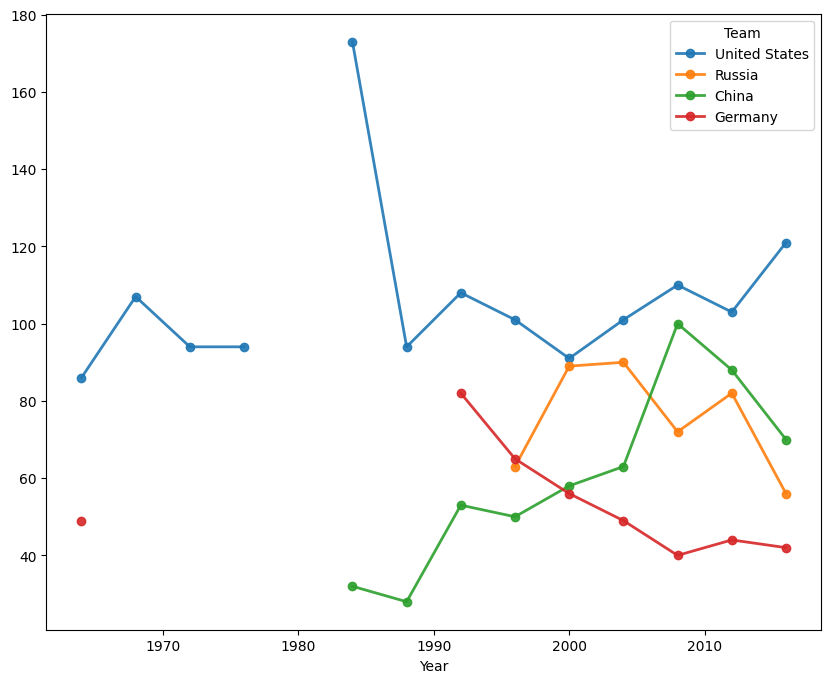

In [108]:
#The countries US, Germany, china and Russia  are the top countries
top_countries = ['United States', 'Russia', 'China', 'Germany']

year_team_medals = pd.pivot_table(medal_tally,
                                 index='Year',
                                 columns= 'Team',
                                 values= 'Medal_Won_Corrected',
                                 aggfunc= 'sum')[top_countries]

#Plotting the medal tallies
year_team_medals.plot(linestyle= '-', marker='o', alpha= 0.9, figsize= (10,8), linewidth=2)
xlabel('Year')
ylabel('Number of Medals')
title('Olympic Performance Comparisom')

DO TEAMS ENJOY HOME ADVANTAGE

In [79]:
#We would compare the performances of these teams in the year when the olympics was held at their home vs one where was held later
#First where was the olympics held in each of the year under consideration
Olympics_complete_subset[['Year', 'City']].drop_duplicates().sort_values('Year')

,Year,City
34,1964,Tokyo
165,1968,Mexico City
35,1972,Munich
85,1976,Montreal
15,1980,Moskva
16,1984,Los Angeles
1,1988,Seoul
19,1992,Barcelona
2,1996,Atlanta
12,2000,Sydney


In [80]:
#We see that maskva and athens arent real cities...we'll replace those values
Olympics_complete_subset['City'].replace(['Athina', 'Moskva'],['Athens', 'Moscow'], inplace=True)

In [81]:
#lets map each city to country
# city to country mapping dictionary
city_to_country = {'Tokyo': 'Japan',
                  'Mexico City': 'Mexico',
                  'Munich': 'Germany',
                  'Montreal': 'Canada',
                  'Moscow': 'Russia',
                  'Los Angeles': 'USA',
                  'Seoul': 'South Korea',
                  'Barcelona': 'Spain',
                  'Atlanta': 'USA',
                  'Sydney': 'Australia',
                  'Athens': 'Greece',
                  'Beijing': 'China',
                  'London': 'UK',
                  'Rio de Janeiro': 'Brazil'}
#Map cities to countries
Olympics_complete_subset['Country_Host'] = Olympics_complete_subset['City'].map(city_to_country)

#print the
Olympics_complete_subset.loc[:, ['Year', 'Country_Host']].drop_duplicates().sort_values('Year')

,Year,Country_Host
34,1964,Japan
165,1968,Mexico
35,1972,Germany
85,1976,Canada
15,1980,Russia
16,1984,USA
1,1988,South Korea
19,1992,Spain
2,1996,USA
12,2000,Australia


The approach for home advantage calculation would be to list host country against each year, playing nation and their total medal tally. Then we would compare performance one edition before and one edition after the olympics was held at that playing country's home.

In [97]:
#Extract year, host nation and team name from the data
year_host_team =Olympics_complete_subset[['Year', 'Country_Host', 'Team']].drop_duplicates()

#check rows where host country is the same as team
row_mask_4= (year_host_team['Country_Host']== year_host_team['Team'])

#add years in the year_host_team to capture one previous and one later year
year_host_team['Prev_Year'] = year_host_team['Year'] - 4
year_host_team['Next_Year'] = year_host_team['Year'] + 4

#subset only where host nation and team were the same
year_host_team = year_host_team[row_mask_4]

#Calculate the medals won in each year where a team played at home , merge year_host_team with medal_tally on year and team 
year_host_team_medal = year_host_team.merge(medal_tally,
                                           left_on =['Year', 'Team'],
                                           right_on=['Year', 'Team'],
                                           how ='left')
year_host_team_medal.rename(columns= {'Medal_Won_Corrected': 'Medal_Won_Host_Year'}, inplace=True)

#calclate medals won by team in previous Year
year_host_team_medal = year_host_team_medal.merge(medal_tally,
                                                 left_on=['Prev_Year', 'Team'],
                                                 right_on=['Year', 'Team'],
                                                 how='left')

year_host_team_medal.drop('Year_y', axis=1, inplace= True)
year_host_team_medal.rename(columns={'Medal_Won_Corrected': 'Medal_Won_Prev_Year',
                                    'Year_x':'Year'}, inplace= True)

#Calculate the medals won by the team the year after they hosted
year_host_team_medal = year_host_team_medal.merge(medal_tally,
                                                 left_on= ['Next_Year', 'Team'],
                                                 right_on = ['Year', 'Team'],
                                                 how='left')

year_host_team_medal.drop('Year_y', axis = 1, inplace = True)
year_host_team_medal.rename(columns = {'Year_x': 'Year',
                                      'Medal_Won_Corrected' : 'Medal_Won_Next_Year'}, inplace = True)

# General formatting changes
year_host_team_medal.drop(['Prev_Year', 'Next_Year'], axis = 1, inplace = True)
#year_host_team_medal.sort_values('Year', ascending = True, inplace = True)
year_host_team_medal.reset_index(inplace = True, drop = True)

# column re-ordering
year_host_team_medal = year_host_team_medal.loc[:, ['Year', 'Country_Host', 'Team', 'Medal_Won_Prev_Year', 'Medal_Won_Host_Year', 'Medal_Won_Next_Year']]

year_host_team_medal

,Year,Country_Host,Team,Medal_Won_Prev_Year,Medal_Won_Host_Year,Medal_Won_Next_Year
0,1992,Spain,Spain,4.0,22.0,17.0
1,1964,Japan,Japan,NaN,29.0,25.0
2,2000,Australia,Australia,41.0,58.0,50.0
3,2016,Brazil,Brazil,17.0,19.0,NaN
4,1976,Canada,Canada,5.0,11.0,NaN
5,1988,South Korea,South Korea,19.0,33.0,28.0
6,2004,Greece,Greece,13.0,16.0,4.0
7,2008,China,China,63.0,100.0,88.0
8,1968,Mexico,Mexico,1.0,9.0,1.0


DOES GDP play a part in Medal tallies

Text(89896.43959680294, 145.0, 'Correlation = 0.2009674736489296')

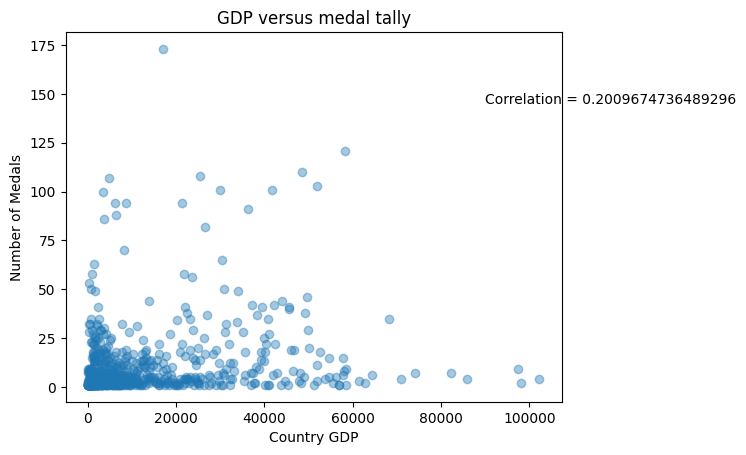

In [114]:
year_team_gdp = Olympics_complete_subset.loc[:, ['Year', 'Team', 'GDP']].drop_duplicates()

medal_tally_gdp = medal_tally.merge(year_team_gdp,
                                   left_on = ['Year', 'Team'],
                                   right_on = ['Year', 'Team'],
                                   how = 'left')

row_mask_5 = medal_tally_gdp['Medal_Won_Corrected'] > 0
row_mask_6 = medal_tally_gdp['Team'].map(lambda x: x in top_countries)

correlation = medal_tally_gdp.loc[row_mask_5, ['GDP', 'Medal_Won_Corrected']].corr()['Medal_Won_Corrected'][0]

plot(medal_tally_gdp.loc[row_mask_5, 'GDP'], 
     medal_tally_gdp.loc[row_mask_5, 'Medal_Won_Corrected'] , 
     linestyle = 'none', 
     marker = 'o',
    alpha = 0.4)
xlabel('Country GDP')

ylabel('Number of Medals')
title('GDP versus medal tally')
text(np.nanpercentile(medal_tally_gdp['GDP'], 99.6), 
     max(medal_tally_gdp['Medal_Won_Corrected']) - 50,
     "Correlation = " + str(correlation))